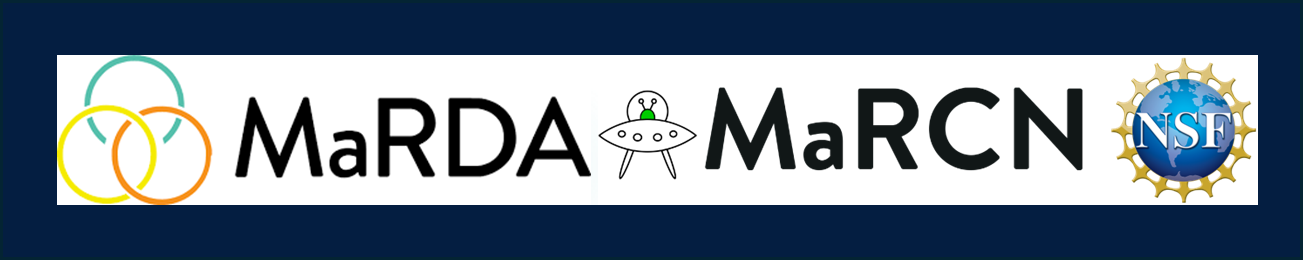

# FAIR Application using Tensile Testing Ontology

Authors: [Erwin Cazares<sup>1</sup>](ecazares3@miners.utep.edu), [Dr Brian E. Schuster<sup>1</sup>](bschuster@utep.edu) </br>

<sup>1</sup> Dynamic Materials Laboratory at University of Texas at El Paso, TX USA 79968</br>

Date of creation: Summer 2024 </br>
Date of last revision: Summer 2024 </br>

# Merge Tensile Databases from JSON files

This notebook is designed to recursively merge dictionaries of tensile tests for various material, which includes the previously defined data extraction from TXT, CSV and Excel reports. The notebook outputs a JSON formated dictionary with the results.

## Dataset Used
The dataset consists of tensile test report data saved in JSON format previously defined. This data was saved in serialized JSON format and is used to extract the metadata and primary data for the material's database.

## Notebook Structure

The notebook is organized into the following sections:

1. **Introduction and Setup:** Provides an overview of the JSON Databases and specifies the working directories.

2. **Data Loading:** Loads the tensile test data from specified directories and prepares the data for analysis.

3. **Data Structuring and Serialization:** Structures the computed data into a dictionary format and serializes it into a JSON file.

## Usage

To effectively utilize this notebook, follow these instructions:

- Ensure all required dependencies are installed and configured correctly. Refer to the provided documentation or requirements.txt file for guidance.
- Specify the working directories and ensure the tensile test data is available in the correct format.
- Run the notebook cells sequentially to perform the analysis and generate the results.
- The notebook will output images and a JSON file containing the analysis results, which can be used for further reference and study.

## Data loading, extraction and merging

In [1]:
import os
import json

# Get the directory of the current script or the parent directory
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.path.dirname(os.getcwd())
print(f'Current working directory = {script_dir}')

# Define the database folder containing the JSON files
database_folder = os.path.join(script_dir, 'data', 'database')

# Initialize an empty dictionary to hold the merged data
merged_dict = {}

# Collect all JSON files from the database folder
json_files = [f for f in os.listdir(database_folder) if f.endswith('.json')]

def merge_tensile_tests(dest, source):
    """
    Merges Tensile_test subkeys from source into dest, ensuring unique keys.
    """
    max_idx = max([int(k.split('_')[-1]) for k in dest.keys() if k.startswith('Tensile_test_')], default=0)
    for key, value in source.items():
        if key.startswith('Tensile_test_'):
            max_idx += 1
            new_key = f'Tensile_test_{max_idx}'
            dest[new_key] = value
        else:
            dest[key] = value
    return dest

def merge_dicts(dict1, dict2):
    """
    Recursively merge two dictionaries, with special handling for Tensile_test subkeys.
    """
    result = dict1.copy()  # Start with dict1's keys and values
    for key, value in dict2.items():
        if key in result:
            if isinstance(result[key], dict) and isinstance(value, dict):
                if key.startswith('Tensile_test_'):
                    result = merge_tensile_tests(result, {key: value})
                else:
                    result[key] = merge_dicts(result[key], value)
            else:
                result[key] = value
        else:
            result[key] = value
    return result

def merge_material_dicts(dict1, dict2):
    """
    Merge dictionaries at the material level.
    """
    for material_key, material_value in dict2.items():
        if material_key in dict1:
            dict1[material_key] = merge_dicts(dict1[material_key], material_value)
        else:
            dict1[material_key] = material_value
    return dict1

# Loop through each JSON file and merge its contents
for json_file in json_files:
    json_path = os.path.join(database_folder, json_file)
    with open(json_path, 'r') as file:
        try:
            data = json.load(file)
            merged_dict = merge_material_dicts(merged_dict, data)
        except json.JSONDecodeError as e:
            print(f"Error reading {json_file}: {e}")

# Define the output file path
output_file = os.path.join(database_folder, 'merged_data.json')

# Write the merged data to the output file
with open(output_file, 'w') as file:
    json.dump(merged_dict, file, indent=4)

print(f'Merged data has been written to {output_file}')

Current working directory = D:\FAIR_Ontology\MaRCN_Tensile_Ontology
Merged data has been written to D:\FAIR_Ontology\MaRCN_Tensile_Ontology\data\database\merged_data.json


## Sanity check

In [2]:
print(merged_dict.keys())

first_key = next(iter(merged_dict))

print(merged_dict["V4_Resin"].keys())

dict_keys(['V4_Resin', 'Unknown_Resin', 'Aluminium_6061', 'Brass', 'Steel_1018', 'Steel_4130'])
dict_keys(['Tensile_test_1', 'Tensile_test_2', 'Tensile_test_3', 'Tensile_test_4', 'Tensile_test_5', 'Tensile_test_6', 'Tensile_test_7', 'Tensile_test_8', 'Tensile_test_9', 'Tensile_test_10'])
